In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
train = pd.read_csv('train_V2.csv')

In [3]:
test = pd.read_csv('test_V2.csv')

In [4]:
Id = test.Id

# Data Preprocessing

## 1.1 Dealing with Null Values

** Only the target column "winPlacePerc" contains one NA. Thus dropping this row will not affect much of the result. ** 

In [5]:
train = train.dropna()
print(train['winPlacePerc'].isnull().sum())

0


## 1.2 Basic EDA

### 1.2.1 Analysis of target variable

In [7]:
train['winPlacePerc'].describe()

count    4.446965e+06
mean     4.728216e-01
std      3.074050e-01
min      0.000000e+00
25%      2.000000e-01
50%      4.583000e-01
75%      7.407000e-01
max      1.000000e+00
Name: winPlacePerc, dtype: float64

/Users/guoshumao/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


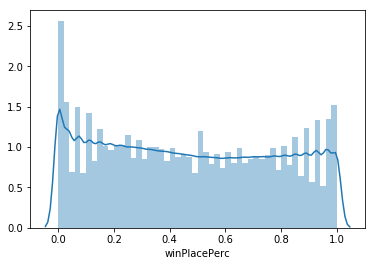

In [8]:
sns.distplot(train['winPlacePerc'])

On average, players rank at 0.4 to 0.5. 

The most acquired win placement percentage is 0.0. Other than that, there is a slight trend that the number of players with high placement percentage ranking from 0.8 to 1.0 and with low placement percentage ranking from 0.0 to 0.2 are more than the number of those who rank between 0.2 to 0.8 catpturing the average percentage.

### 1.2.2 Analysis of relations between killPlace and winPlacePerc

In [9]:
# Categorizing killPlace in the training set
print('Max place:', train['killPlace'].max())
print('Min place:', train['killPlace'].min())
print('25% percentile:', np.percentile(train['killPlace'], 25))
print('50% percentile:', np.percentile(train['killPlace'], 50))
print('75% percentile:', np.percentile(train['killPlace'], 75))

Max place: 101
Min place: 1
25% percentile: 24.0
50% percentile: 47.0
75% percentile: 71.0


In [10]:
data = train.copy()
data['killPlaceCategories'] = pd.cut(data['killPlace'], [0,24,47,71,101], labels=['25%','25% to 50%', '50% to 75%','75% to 100%'])

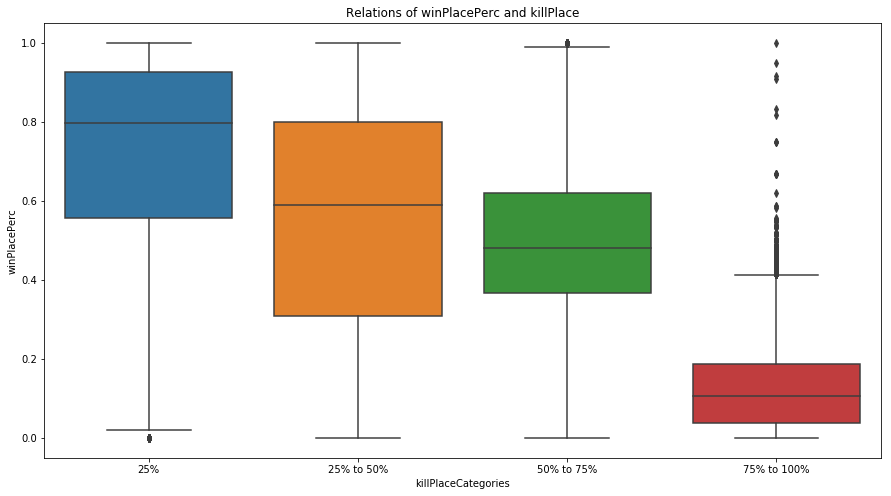

In [11]:
plt.figure(figsize=(15,8))
sns.boxplot(x="killPlaceCategories", y="winPlacePerc", data=data)
plt.title('Relations of winPlacePerc and killPlace')
plt.show()

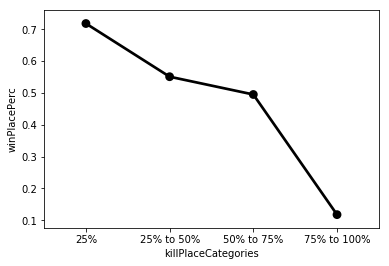

In [12]:
sns.pointplot(x="killPlaceCategories", y="winPlacePerc", data=data,color='black',alpha=0.8)

### 1.2.3 Dealing with Outliers

In [5]:
train.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,...,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


In [8]:
print("shape of dataframe before processing: ", train.shape)

shape of dataframe before processing:  (4446965, 29)


In [6]:
# dropping the killing without moving playes' data
train['totalDistance'] = train['rideDistance'] + train['walkDistance'] + train['swimDistance']
train['killsWithoutMoving'] = ((train['kills'] > 0) & (train['totalDistance'] == 0))
train.drop(train[train['killsWithoutMoving'] == True].index, inplace=True)

# dropping players' data with extreme long distance kills
train.drop(train[train['longestKill'] >= 1000].index, inplace=True)

# dropping players' data with extreme moving distance
train.drop(train[train['walkDistance'] >= 10000].index, inplace=True)
train.drop(train[train['rideDistance'] >= 20000].index, inplace=True)
train.drop(train[train['swimDistance'] >= 2000].index, inplace=True)

# dropping players' data with extreme killing counts
train.drop(train[train['kills'] > 30].index, inplace=True)
train.drop(train[train['roadKills'] > 10].index, inplace=True)

# deleting extreme damageDealt data
train.drop(train[train['damageDealt'] >= (np.percentile(train['damageDealt'], 99))].index, inplace=True)

# deleting extreme acquired weapons and heals data
train.drop(train[train['weaponsAcquired'] >= (np.percentile(train['weaponsAcquired'], 99))].index, inplace=True)
train.drop(train[train['heals'] >= (np.percentile(train['heals'], 99))].index, inplace=True)

In [10]:
print("shape of dataframe after processing: ", train.shape)

shape of dataframe after processing:  (4277231, 31)


In [7]:
train = train.drop(['killsWithoutMoving','totalDistance'],axis=1)

### 1.2.4 Analysis of relations between munitions and winPlacePerc

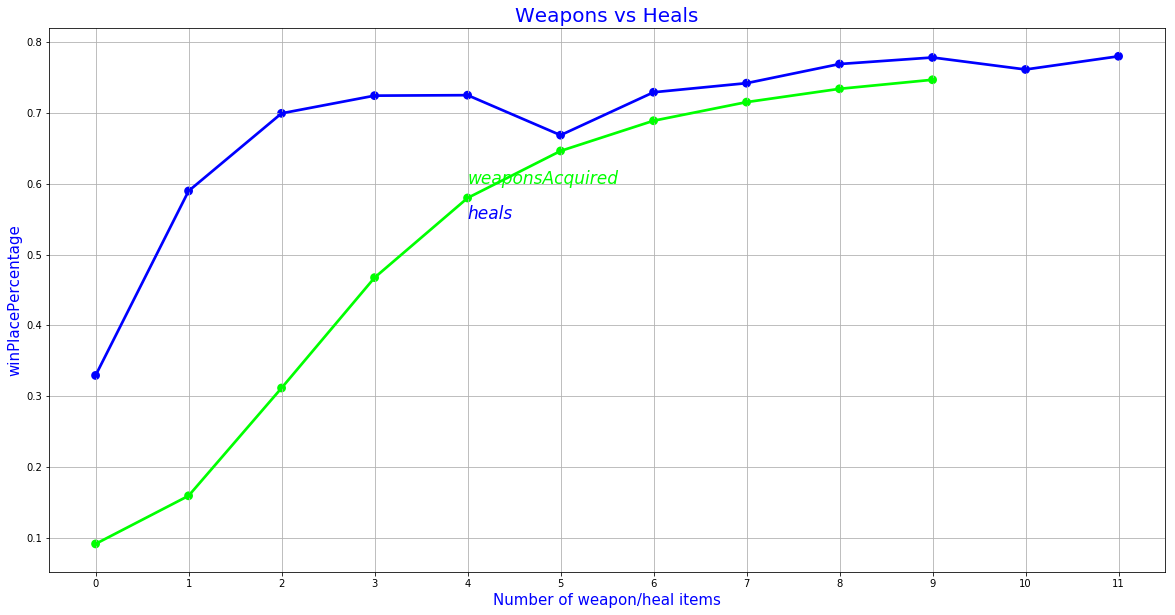

In [0]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='weaponsAcquired',y='winPlacePerc',data=train,color='lime',alpha=0.8)
sns.pointplot(x='heals',y='winPlacePerc',data=train,color='blue',alpha=0.8)
plt.text(4,0.6,'weaponsAcquired',color='lime',fontsize = 17,style = 'italic')
plt.text(4,0.55,'heals',color='blue',fontsize = 17,style = 'italic')
plt.xlabel('Number of weapon/heal items',fontsize = 15,color='blue')
plt.ylabel('winPlacePercentage',fontsize = 15,color='blue')
plt.title('Weapons vs Heals',fontsize = 20,color='blue')
plt.grid()
plt.show()

# Modeling

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from fastai.imports import *

In [9]:
# Metric used for the PUBG competition (Mean Absolute Error (MAE))
from sklearn.metrics import mean_absolute_error

# Function to print the MAE (Mean Absolute Error) score
def print_score(a):
    res = ['mae train: ', mean_absolute_error(a.predict(X_train), y_train), 
           'mae val: ', mean_absolute_error(a.predict(X_val), y_val)]
    print(res)

In [10]:
# Concatenating two dataset in order to do data preprocessing in both sets
df = pd.concat([train,test],ignore_index = True)

/Users/guoshumao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


In [11]:
# dealing with categorical variables
df = df.drop(['Id','matchId','groupId','matchType'],axis=1)

## 2.1 Model Selection

** Using cross-validation and mean absolute value to find the suitable model **

In [12]:
# split train and test set
train_pro = df[~df['winPlacePerc'].isnull()]
test_pro = df[df['winPlacePerc'].isnull()]
print(train_pro.shape)
print(test_pro.shape)

(4277231, 25)
(1934174, 25)


In [13]:
test_pro = test_pro.drop(['winPlacePerc'],axis=1)

In [14]:
X = train_pro.drop(['winPlacePerc'],axis=1).values
y = train_pro.winPlacePerc.values

In [15]:
# split train and validation set for model selection
X_train, X_val, y_train, y_val = train_test_split(X,y,
                                                train_size=0.8,
                                                test_size=0.2,
                                                random_state=100,)

In [26]:
# LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
print_score(lm)
print("linearRegression train_score ", lm.score(X_train, y_train))
print("linearRegression val_score",lm.score(X_val, y_val))

cv_results_lm = cross_val_score(lm,X,y,cv=5)
print("linearRegression cross-validation score: ", np.mean(cv_results_lm))

['mae train: ', 0.09058315880553904, 'mae val: ', 0.09066648642728886]
linearRegression train_score  0.8343815598771263
linearRegression val_score 0.8336149819952773
linearRegression cross-validation score:  0.8342261932887418


In [27]:
# RidgeRegression
steps_rd = [('scaler', StandardScaler()),
         ('rd', Ridge())]
pipeline_rd = Pipeline(steps_rd)

pipeline_rd.fit(X_train,y_train)
print_score(pipeline_rd)
print("RidgeRegression train_score ", pipeline_rd.score(X_train, y_train))
print("RidgeRegression val_score",pipeline_rd.score(X_val, y_val))

cv_results_rd = cross_val_score(pipeline_rd,X,y,cv=5)
print("RidgeRegression cross-validation score", np.mean(cv_results_rd))

['mae train: ', 0.09058311782248522, 'mae val: ', 0.09066645009416854]
RidgeRegression train_score  0.8343815598354605
RidgeRegression val_score 0.8336149766936369
RidgeRegression cross-validation score 0.8342261933192596


In [19]:
# Random Forest
rf = RandomForestRegressor(oob_score=True)
rf.fit(X_train,y_train)
print_score(rf)
print("RandomForest train_score ", rf.score(X_train, y_train))
print("RandomForest val_score ", rf.score(X_val, y_val))
print("RandomForest oob_score ", rf.oob_score_)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


['mae train: ', 0.023991752632434263, 'mae val: ', 0.060670220604439974]
RandomForest train_score  0.9857706583053415
RandomForest val_score  0.9205669649554895
RandomForest oob_score  0.8692696087136458


In [0]:
# Random Forest cross-validation
cv_results_rf = cross_val_score(rf,X,y,cv=5)
print("RandomForest cross-validation score", np.mean(cv_results_rf))

/Users/guoshumao/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/guoshumao/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/guoshumao/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/guoshumao/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable o

RandomForest cross-validation score 0.9207450452273122


** Select RandomForestRegressor because of the lowest MAE **

## 2.2 Naive Model

### 2.2.1 assume everyone loses

In [17]:
# assume everyone loses
y_train = y_train * 0

# Random Forest
rf_naive = RandomForestRegressor()
rf_naive1.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [21]:
# predict and submit answer
print_score(rf_naive)

predictions = rf_naive.predict(test_pro)
pred_df = pd.DataFrame({'Id' : Id, 'winPlacePerc' : predictions})
pred_df.to_csv("naive submission.csv", index=False)

['mae train: ', 0.0, 'mae val: ', 0.4601382231745509]


### 2.2.2 assume killPlace is the only feature that affects target

In [15]:
data = df[['killPlace','winPlacePerc']]

In [16]:
train_pro = data[~data['winPlacePerc'].isnull()]
test_pro = data[data['winPlacePerc'].isnull()]

test_pro = test_pro.drop(['winPlacePerc'],axis=1)

X = train_pro.drop(['winPlacePerc'],axis=1).values
y = train_pro.winPlacePerc.values

# split train and validation set for model selection
X_train, X_val, y_train, y_val = train_test_split(X,y,
                                                train_size=0.8,
                                                test_size=0.2,
                                                random_state=100,)

### 2.2.3 assume walkDistance is the only feature that affects target

In [12]:
data = df[['walkDistance','winPlacePerc']]

In [13]:
train_pro = data[~data['winPlacePerc'].isnull()]
test_pro = data[data['winPlacePerc'].isnull()]

test_pro = test_pro.drop(['winPlacePerc'],axis=1)

X = train_pro.drop(['winPlacePerc'],axis=1).values
y = train_pro.winPlacePerc.values

# split train and validation set for model selection
X_train, X_val, y_train, y_val = train_test_split(X,y,
                                                train_size=0.8,
                                                test_size=0.2,
                                                random_state=100,)

In [14]:
rf_naive2 = RandomForestRegressor()
rf_naive2.fit(X_train,y_train)
# predict and submit answer
print_score(rf_naive2)

['mae train: ', 0.11333337417470878, 'mae val: ', 0.11449270608600665]


In [17]:
rf_naive3 = RandomForestRegressor()
rf_naive3.fit(X_train,y_train)
# predict and submit answer
print_score(rf_naive3)

['mae train: ', 0.12629850906697512, 'mae val: ', 0.126360255333807]


## 2.3 Feature Engineering

#### Because there is not necessarily 100 players in every match, thus to normalize some features by number of players joined in each match can result in a better result in prediction.

In [8]:
# Concatenating two dataset in order to do data preprocessing in both sets
df = pd.concat([train,test],ignore_index = True)

/Users/guoshumao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


In [9]:
# Define player joined by matchId
df['playersJoined'] = df.groupby('matchId')['matchId'].transform('count')

# Define a function to normalizing data
def normalize_data(feature_list):
    for feature in feature_list:
        df[feature] = df[feature] * ((100-df['playersJoined'])/100 + 1)
    

normalize_data(['kills','damageDealt','maxPlace','killPlace','assists'])
df = df.drop(['playersJoined'], axis = 1)

#### Assume most winners are common players. For elite players killPlace, damageDealt, headShotKills and killStreaks are important features. But the game is won mostly by common players, thus assists, revives, totalDistance, DBNOs and groupType might be important features. 

In [10]:
kills = df[['assists','winPlacePerc','kills']]
kills['kills_assists'] = (kills['kills'] + kills['assists'])
df['kills_assists'] = kills['kills_assists']

movement = df[['walkDistance','swimDistance','winPlacePerc']]
movement['walk_swimDistance'] = (movement['walkDistance'] + movement['swimDistance'])
df['walk_swimDistance'] = movement['walk_swimDistance']

munitions = df[['heals','winPlacePerc','weaponsAcquired']]
munitions['heals_weaponsAcquired'] = (munitions['heals'] + munitions['weaponsAcquired'])
df['heals_weaponsAcquired'] = munitions['heals_weaponsAcquired']

kill_skill = df[['headshotKills','winPlacePerc','roadKills']]
kill_skill['kill_skill'] = (kill_skill['headshotKills'] + kill_skill['roadKills'])
df['kill_skill'] = kill_skill['kill_skill']

teamwork = df[['assists','winPlacePerc','revives']]
teamwork['teamwork'] = (teamwork['assists'] + teamwork['revives'])
df['teamwork'] = teamwork['teamwork']

/Users/guoshumao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/guoshumao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/guoshumao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org

#### Count the mean of each group. Features selected according to random forest feature importance.

#### Assume the best player in the team have a large effect on the last placement.

In [11]:
cols = list(df.columns)
cols_exclude = ['Id','matchId','groupId','matchType','winPlacePerc','maxPlace','numGroups']
for c in cols_exclude:
    cols.remove(c)

agg_max = df.groupby(['matchId','groupId','matchType'])[cols].agg('max')
df = df.merge(agg_max, suffixes=["", "_max"], how='left', on=['groupId','matchId'])

In [12]:
agg_mean = df.groupby(['matchId','groupId','matchType'])[cols].agg('mean')
df = df.merge(agg_mean, suffixes=["", "_mean"], how='left', on=['groupId','matchId'])

In [13]:
df.columns

Index(['DBNOs', 'Id', 'assists', 'boosts', 'damageDealt', 'groupId',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'killStreaks',
       'kills', 'longestKill', 'matchDuration', 'matchId', 'matchType',
       'maxPlace', 'numGroups', 'rankPoints', 'revives', 'rideDistance',
       'roadKills', 'swimDistance', 'teamKills', 'vehicleDestroys',
       'walkDistance', 'weaponsAcquired', 'winPlacePerc', 'winPoints',
       'kills_assists', 'walk_swimDistance', 'heals_weaponsAcquired',
       'kill_skill', 'teamwork', 'DBNOs_max', 'assists_max', 'boosts_max',
       'damageDealt_max', 'headshotKills_max', 'heals_max', 'killPlace_max',
       'killPoints_max', 'killStreaks_max', 'kills_max', 'longestKill_max',
       'matchDuration_max', 'rankPoints_max', 'revives_max',
       'rideDistance_max', 'roadKills_max', 'swimDistance_max',
       'teamKills_max', 'vehicleDestroys_max', 'walkDistance_max',
       'weaponsAcquired_max', 'winPoints_max', 'kills_assists_max',
       'walk_s

** Correlations between variables **

In [15]:
# split the train and test set
train_pro = df[~df['winPlacePerc'].isnull()]
test_pro = df[df['winPlacePerc'].isnull()]
print(train_pro.shape)
print(test_pro.shape)

(4277231, 88)
(1934174, 88)


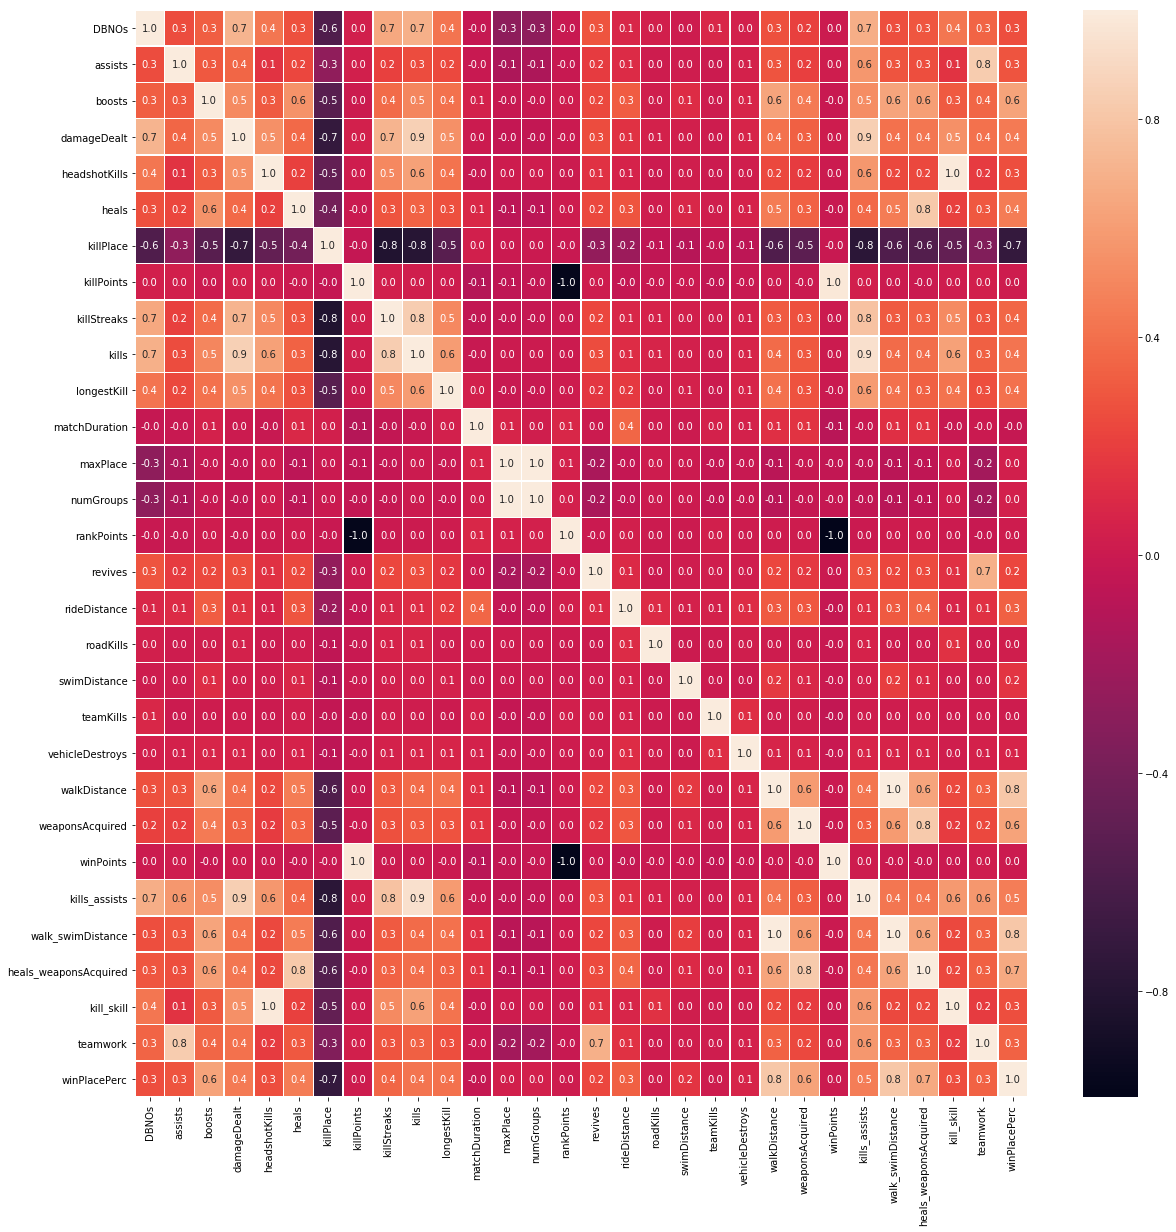

In [27]:
f,ax = plt.subplots(figsize=(20, 20))
features_before = ['DBNOs', 'assists', 'boosts', 'damageDealt', 
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'killStreaks',
       'kills', 'longestKill', 'matchDuration',
       'maxPlace', 'numGroups', 'rankPoints', 'revives', 'rideDistance',
       'roadKills', 'swimDistance', 'teamKills', 'vehicleDestroys',
       'walkDistance', 'weaponsAcquired', 'winPoints',
       'kills_assists', 'walk_swimDistance', 'heals_weaponsAcquired',
       'kill_skill', 'teamwork','winPlacePerc', ]
sns.heatmap(train_pro[features_before].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

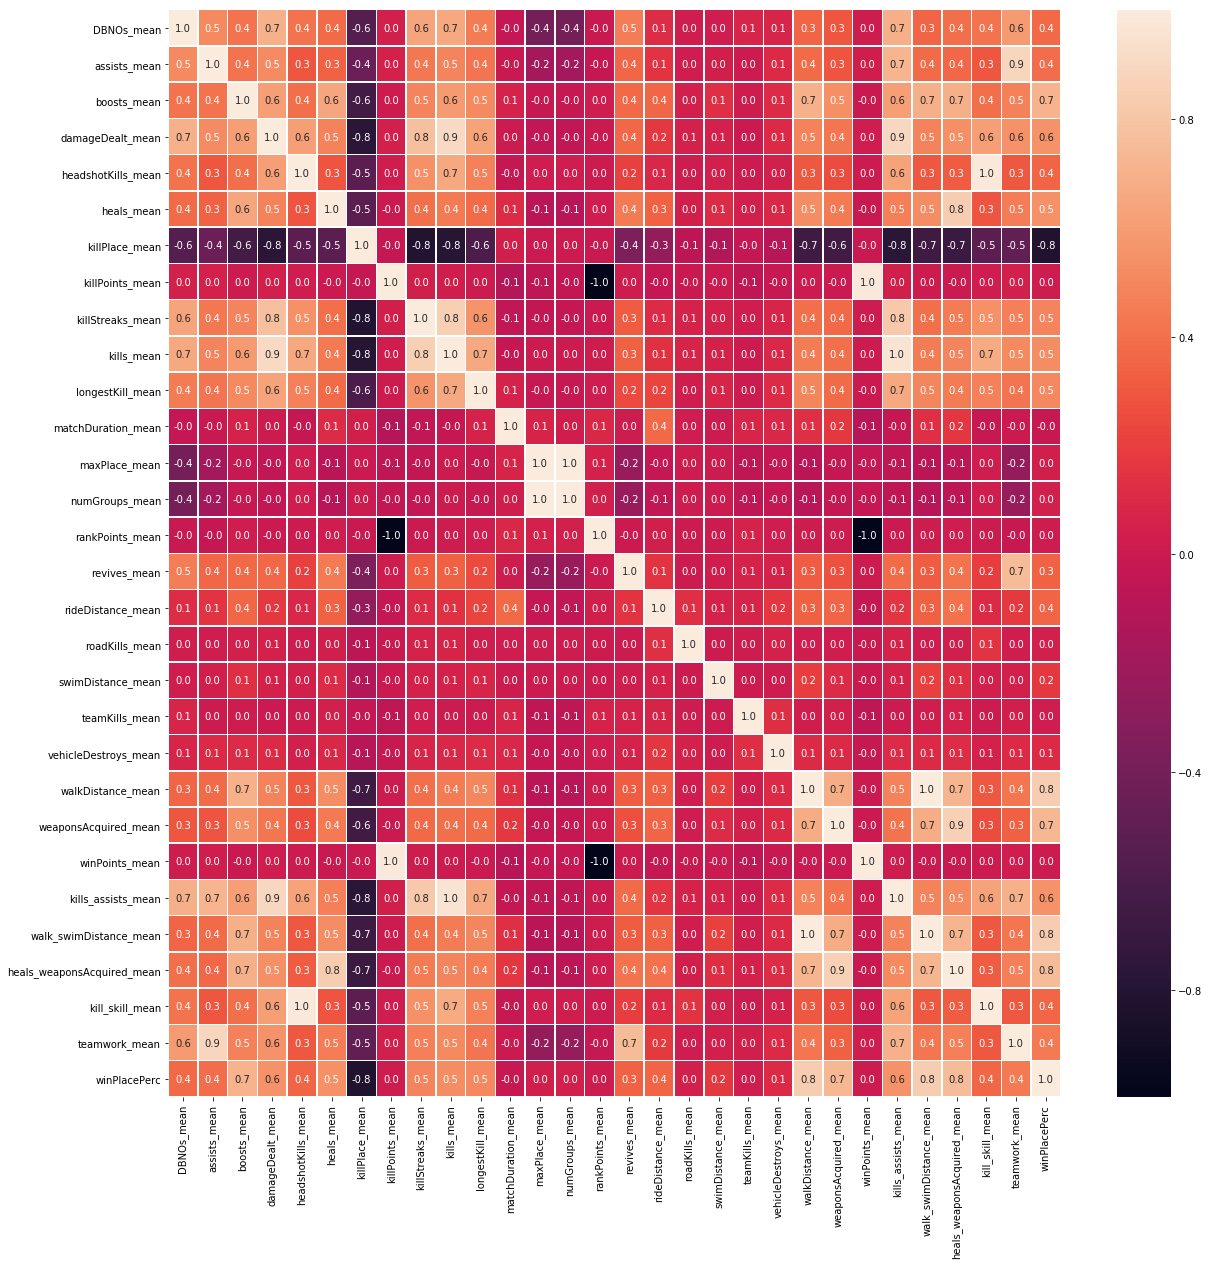

In [28]:
f,ax = plt.subplots(figsize=(20, 20))
features_after = ['DBNOs_mean', 'assists_mean', 'boosts_mean',
       'damageDealt_mean', 'headshotKills_mean', 'heals_mean',
       'killPlace_mean', 'killPoints_mean', 'killStreaks_mean', 'kills_mean',
       'longestKill_mean', 'matchDuration_mean', 'maxPlace_mean',
       'numGroups_mean', 'rankPoints_mean', 'revives_mean',
       'rideDistance_mean', 'roadKills_mean', 'swimDistance_mean',
       'teamKills_mean', 'vehicleDestroys_mean', 'walkDistance_mean',
       'weaponsAcquired_mean', 'winPoints_mean',
       'kills_assists_mean', 'walk_swimDistance_mean',
       'heals_weaponsAcquired_mean', 'kill_skill_mean', 'teamwork_mean','winPlacePerc']
sns.heatmap(train_pro[features_after].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

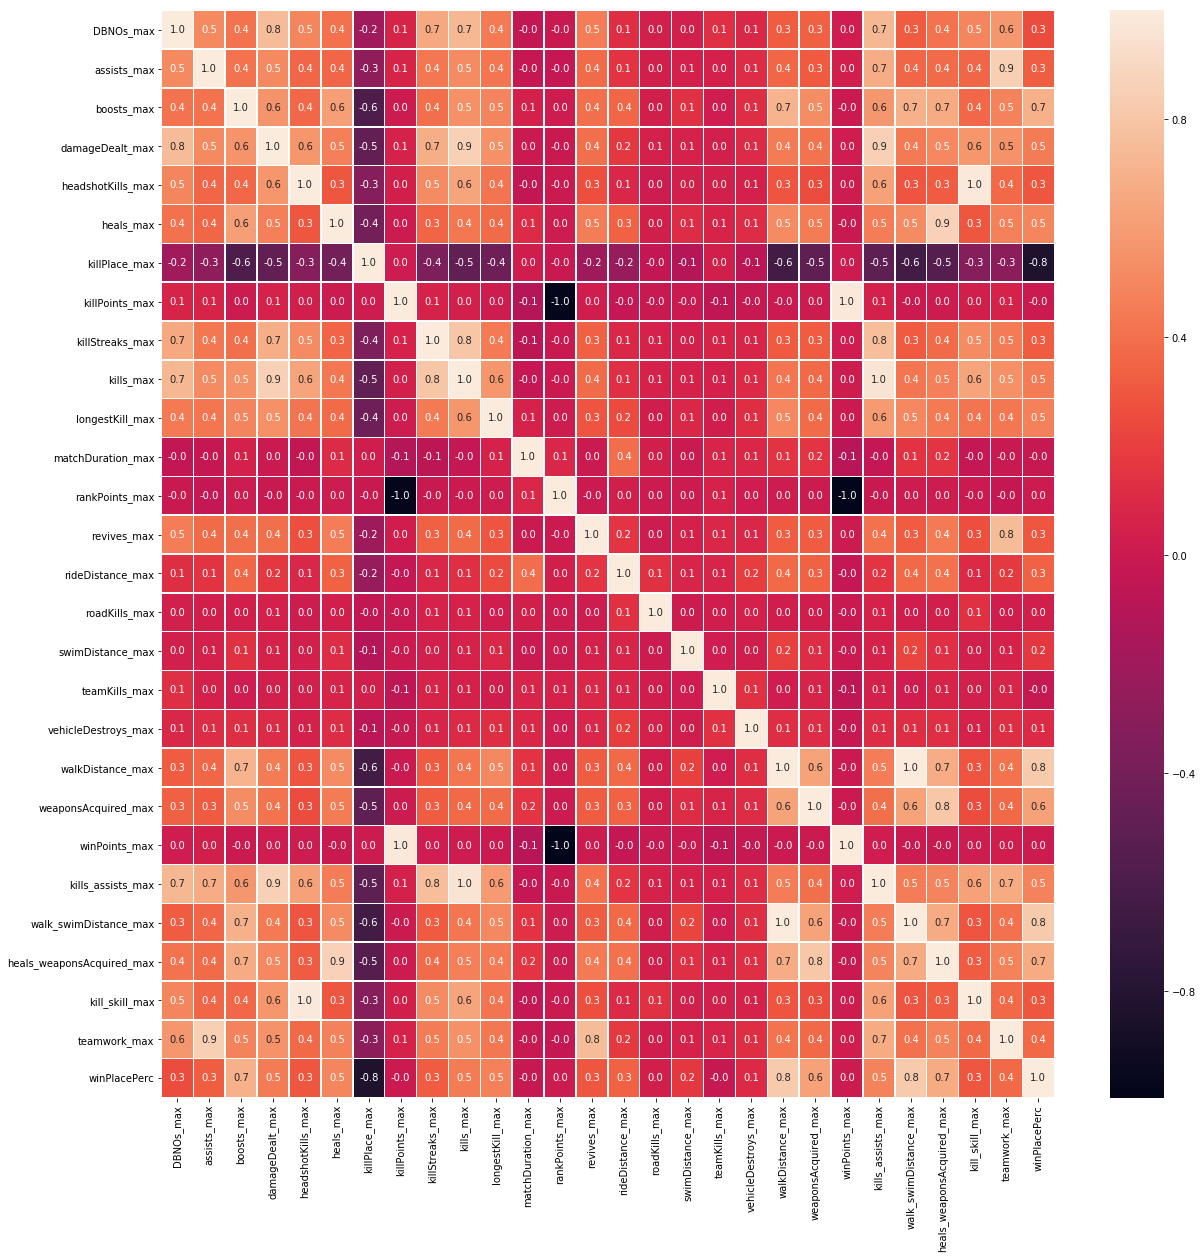

In [16]:
f,ax = plt.subplots(figsize=(20, 20))
features_after = ['DBNOs_max', 'assists_max', 'boosts_max',
       'damageDealt_max', 'headshotKills_max', 'heals_max', 'killPlace_max',
       'killPoints_max', 'killStreaks_max', 'kills_max', 'longestKill_max',
       'matchDuration_max', 'rankPoints_max', 'revives_max',
       'rideDistance_max', 'roadKills_max', 'swimDistance_max',
       'teamKills_max', 'vehicleDestroys_max', 'walkDistance_max',
       'weaponsAcquired_max', 'winPoints_max', 'kills_assists_max',
       'walk_swimDistance_max', 'heals_weaponsAcquired_max', 'kill_skill_max',
       'teamwork_max','winPlacePerc']
sns.heatmap(train_pro[features_after].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

** drop unimportant features **

In [17]:
df = df.drop(['Id','matchId','groupId','matchType'],axis=1)

### Second Random Forest

In [18]:
from sklearn.ensemble import RandomForestRegressor
from fastai.imports import *

In [19]:
# Metric used for the PUBG competition (Mean Absolute Error (MAE))
from sklearn.metrics import mean_absolute_error

# Function to print the MAE (Mean Absolute Error) score
def print_score(a):
    res = ['mae train: ', mean_absolute_error(a.predict(X_train), y_train), 
           'mae val: ', mean_absolute_error(a.predict(X_val), y_val)]
    print(res)

In [20]:
# split train and test set
train_pro = df[~df['winPlacePerc'].isnull()]
test_pro = df[df['winPlacePerc'].isnull()]
print(train_pro.shape)
print(test_pro.shape)

test_pro = test_pro.drop(['winPlacePerc'],axis=1)

(4277231, 84)
(1934174, 84)


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
# split set into train and test
X = train_pro.drop(['winPlacePerc'],axis=1).values
y = train_pro.winPlacePerc.values

X_train, X_val, y_train, y_val = train_test_split(X,y,
                                                train_size=0.8,
                                                test_size=0.2,
                                                random_state=100,)

In [23]:
# Random Forest
rf2 = RandomForestRegressor(oob_score=True)
rf2.fit(X_train,y_train)
print_score(rf2)
print("RandomForest train_score 2: ", rf2.score(X_train, y_train))
print("RandomForest val_score 2: ", rf2.score(X_val, y_val))
print("RandomForest oob_score 2: ", rf2.oob_score_)

/Users/guoshumao/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


['mae train: ', 0.009988753942884931, 'mae val: ', 0.02476620692571398]
RandomForest train_score 2:  0.996223859498698
RandomForest val_score 2:  0.9802665445043705
RandomForest oob_score 2:  0.9403871613953029


** Use Random Forest to plot the feature importance **

In [24]:
column_names = train_pro.drop(['winPlacePerc'],axis=1).columns

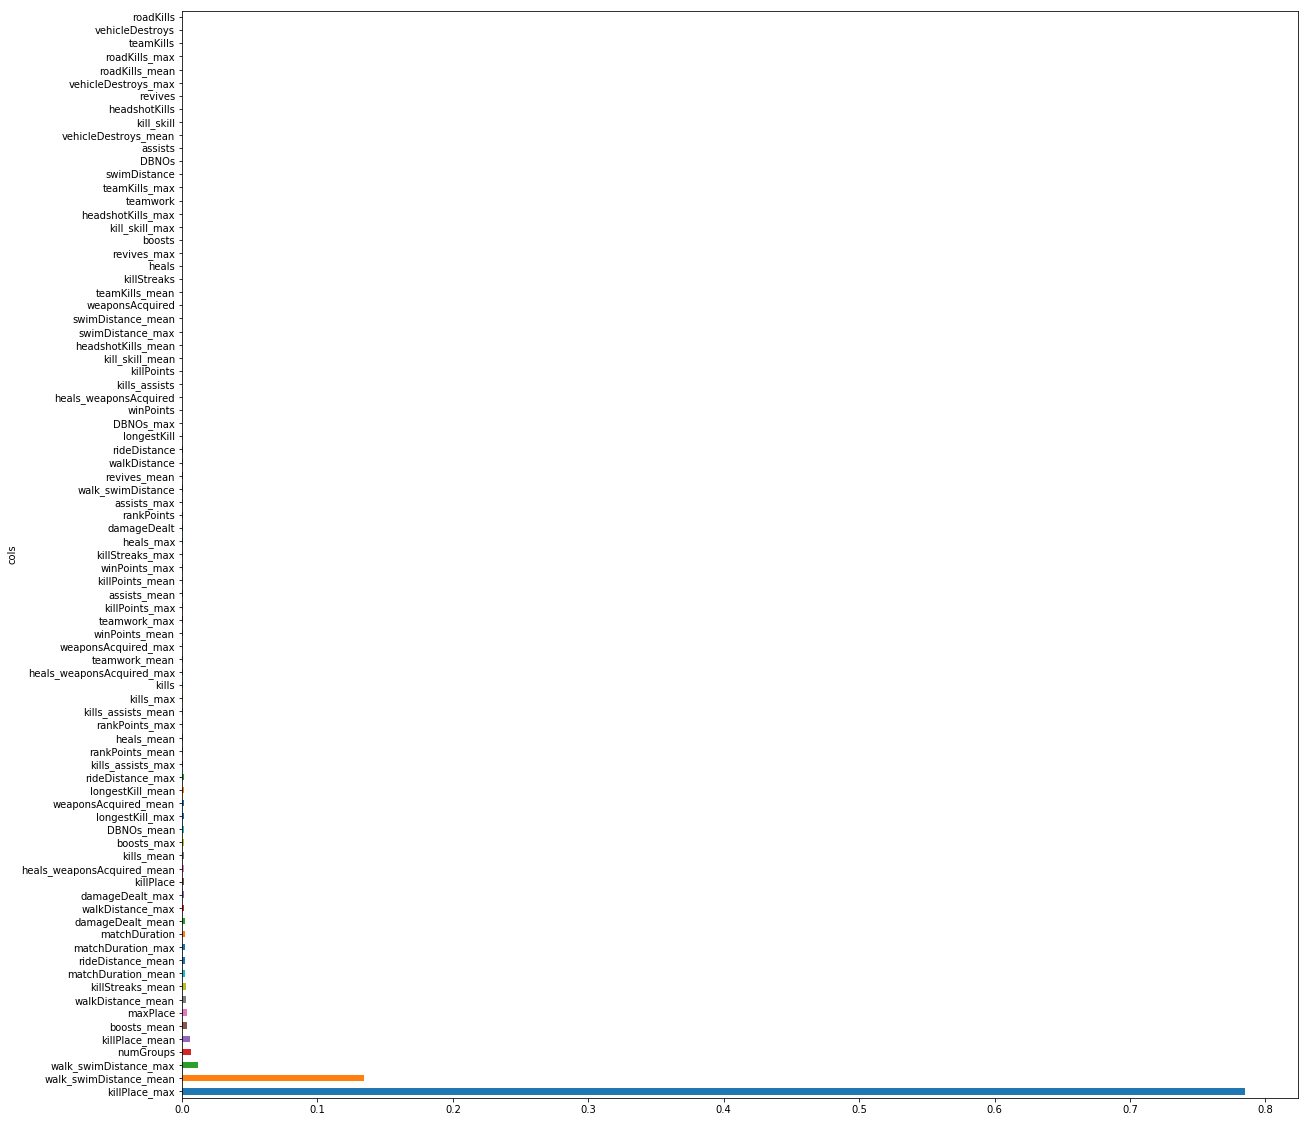

In [25]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':column_names, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

fi = rf_feat_importance(rf2, train_pro)
plot = fi.plot('cols', 'imp', figsize=(20,20), legend=False, kind = 'barh')

### Third Random Forest

** Use the top 20 features to make prediction **

In [23]:
top = list(fi[:20]['cols'])
top.append('winPlacePerc')
df = df[top]

In [24]:
# split train and test set
train_pro = df[~df['winPlacePerc'].isnull()]
test_pro = df[df['winPlacePerc'].isnull()]
print(train_pro.shape)
print(test_pro.shape)

test_pro = test_pro.drop(['winPlacePerc'],axis=1)

X = train_pro.drop(['winPlacePerc'],axis=1).values
y = train_pro.winPlacePerc.values

X_train, X_val, y_train, y_val = train_test_split(X,y,
                                                train_size=0.8,
                                                test_size=0.2,
                                                random_state=100,)

(4277231, 21)
(1934174, 21)


In [25]:
# Random Forest
rf3 = RandomForestRegressor(oob_score=True)
rf3.fit(X_train,y_train)
print_score(rf3)
print("RandomForest train_score 3: ", rf3.score(X_train, y_train))
print("RandomForest val_score 3: ", rf3.score(X_val, y_val))
print("RandomForest oob_score 3: ", rf3.oob_score_)

/Users/guoshumao/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


['mae train: ', 0.008902775302444203, 'mae val: ', 0.022252096031701675]
RandomForest train_score 3:  0.9966210664016879
RandomForest val_score 3:  0.982229542163338
RandomForest oob_score 3:  0.9428761199159674


In [26]:
# predict and submit answer
predictions = rf3.predict(test_pro)
pred_df = pd.DataFrame({'Id' : Id, 'winPlacePerc' : predictions})
pred_df.to_csv("submission.csv", index=False)